In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [15]:
#covid_crime_micro_geo_11_29_2021.csv
#precovid_crime_micro_geo_11_29_2021.csv

df = pd.read_csv('precovid_crime_micro_geo_11_29_2021.csv')
df.head()
#df = df.iloc[:, 1:]
df.columns

Index(['Unnamed: 0', 'SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE',
       'date', 'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

preprocessing

In [38]:
preDF = pd.read_csv('precovid_crime_micro_geo_11_29_2021.csv')
postDF = pd.read_csv('covid_crime_micro_geo_11_29_2021.csv')
preDF = preDF.iloc[:, 1:]
postDF = postDF.iloc[:, 1:]
preDF = preDF.drop(columns = ['total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])
postDF = postDF.drop(columns = ['SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 'total_cases', 
                                            'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 
                                            'ward_7', 'ward_8'])
#print(postDF.columns)
#print(preDF.columns)


#preDF = pd.read_csv('preCovid_crime.csv', usecols = range(1,25))
#postDF = pd.read_csv('Covid_crime.csv', usecols = range(1,25))
#preDF['year'] = pd.DatetimeIndex(preDF['date']).year
#preDF['month'] = pd.DatetimeIndex(preDF['date']).month
#preDF['day'] = pd.DatetimeIndex(preDF['date']).day
#preDF['covid_daily_case_count'] = 0
#preDF['covid_deaths'] = 0
#postDF['year'] = pd.DatetimeIndex(postDF['date']).year
#postDF['month'] = pd.DatetimeIndex(postDF['date']).month
#postDF['day'] = pd.DatetimeIndex(postDF['date']).day
#preDF = pd.get_dummies(preDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])
#postDF = pd.get_dummies(postDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])

Index(['WARD', 'daily_cases', 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD',
       'MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU', 'JAN', 'FEB', 'MAR', 'APR',
       'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ARSON',
       'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT', 'distance_metro',
       'distance_nightclubs', 'distance_worship'],
      dtype='object')
Index(['WARD', 'daily_cases', 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD',
       'MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU', 'JAN', 'FEB', 'MAR', 'APR',
       'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ARSON',
       'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT', 'distance_metro',
       'distance_nightclubs', 'distance_worship'],
      dtype='object'

split pre-covid

In [39]:
preX = preDF.loc[:, preDF.columns != 'WARD'].values
preY = preDF['WARD'].values


pre_x_train, pre_x_test, pre_y_train, pre_y_test = train_test_split(preX, preY, test_size = .2, random_state = 12345)

split during/post-covid

In [40]:
postX = postDF.loc[:, postDF.columns != 'WARD'].values
postY = postDF['WARD'].values


post_x_train, post_x_test, post_y_train, post_y_test = train_test_split(postX, postY, test_size = .2, random_state = 12345)

In [41]:
preclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)
postclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)

#preclf.fit(preX, preY.ravel())
#postclf.fit(postX, postY.ravel())
preclf.fit(pre_x_train, pre_y_train)
postclf.fit(post_x_train, post_y_train)

RandomForestClassifier(max_depth=5, n_estimators=800)

# Pre Importances

<AxesSubplot:>

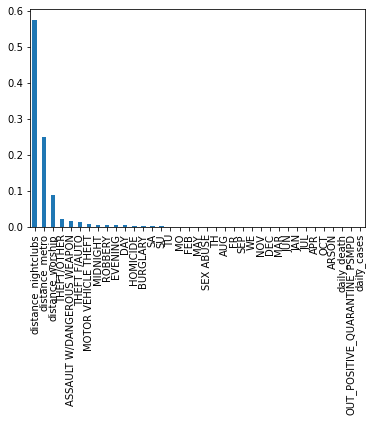

In [42]:
importance = pd.Series(preclf.feature_importances_, index = preDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [43]:
importance

distance_nightclubs              0.575610
distance_metro                   0.250236
distance_worship                 0.087645
THEFT/OTHER                      0.020847
ASSAULT W/DANGEROUS WEAPON       0.016890
THEFT F/AUTO                     0.014147
MOTOR VEHICLE THEFT              0.008734
MIDNIGHT                         0.004986
ROBBERY                          0.004606
EVENING                          0.004250
DAY                              0.003810
HOMICIDE                         0.001950
BURGLARY                         0.001591
SA                               0.000652
SU                               0.000603
TU                               0.000285
MO                               0.000259
FEB                              0.000230
MAY                              0.000218
SEX ABUSE                        0.000213
TH                               0.000198
AUG                              0.000197
FR                               0.000194
SEP                              0

# Post importances

<AxesSubplot:>

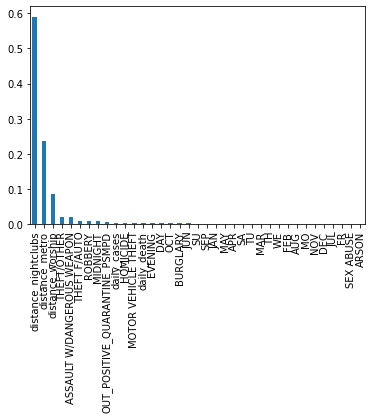

In [44]:
importance = pd.Series(postclf.feature_importances_, index = postDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [45]:
importance

distance_nightclubs              0.591007
distance_metro                   0.237027
distance_worship                 0.086019
THEFT/OTHER                      0.019552
ASSAULT W/DANGEROUS WEAPON       0.018857
THEFT F/AUTO                     0.007856
ROBBERY                          0.007156
MIDNIGHT                         0.006767
OUT_POSITIVE_QUARANTINE_PSMPD    0.004666
daily_cases                      0.003294
HOMICIDE                         0.003009
MOTOR VEHICLE THEFT              0.002926
daily_death                      0.002325
EVENING                          0.001030
DAY                              0.000936
OCT                              0.000655
BURGLARY                         0.000569
JUN                              0.000563
SU                               0.000490
SEP                              0.000461
JAN                              0.000412
MAY                              0.000403
APR                              0.000395
SA                               0

# Combined Importances

In [50]:
combinedDF = pd.concat([preDF, postDF])

In [51]:
combinedX = combinedDF.loc[:, combinedDF.columns != 'WARD'].values
combinedY = combinedDF['WARD'].values

(combined_x_train, combined_x_test,
 combined_y_train, combined_y_test) = train_test_split(combinedX, combinedY, test_size = .2, random_state = 12345)

combinedclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)
combinedclf.fit(combined_x_train, combined_y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=2000)

<AxesSubplot:>

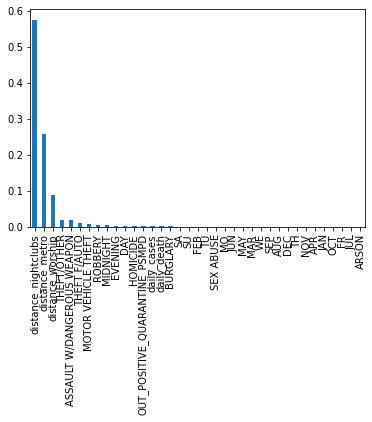

In [52]:
importance = pd.Series(combinedclf.feature_importances_, index = combinedDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [53]:
count = 0

for value in importance:
    print(importance.index[count], str(value))
    count += 1

distance_nightclubs 0.5753493550325137
distance_metro 0.2577726725973742
distance_worship 0.08674708178773091
THEFT/OTHER 0.01957364135116772
ASSAULT W/DANGEROUS WEAPON 0.018221749539312167
THEFT F/AUTO 0.011290996264459145
MOTOR VEHICLE THEFT 0.006205416840953427
ROBBERY 0.005366702821898229
MIDNIGHT 0.004671253785936994
EVENING 0.0027526117628886185
DAY 0.0022283803279380624
HOMICIDE 0.0021289147469639724
OUT_POSITIVE_QUARANTINE_PSMPD 0.0018013228895990805
daily_cases 0.0015677335759684058
daily_death 0.0008521093961066538
BURGLARY 0.0008218521361374927
SA 0.00041662196022300175
SU 0.0003997026452463396
FEB 0.0001698131962846955
TU 0.00014825922175913997
SEX ABUSE 0.00012915957382286927
MO 0.00011169018808832262
JUN 0.00011165979700876592
MAY 0.00010640841938251255
MAR 9.99433099335596e-05
WE 9.7483077389135e-05
SEP 9.628503916952064e-05
AUG 9.584661202644984e-05
DEC 9.487335381606112e-05
TH 9.25334844902366e-05
NOV 8.78066879718382e-05
APR 8.566109932940908e-05
JAN 8.375055379485526

# Predictions

In [54]:
#using pre data to predict post
y_pred = preclf.predict(post_x_test)

print(metrics.accuracy_score(post_y_test, y_pred))

0.4339163674273138


In [55]:
#using post data to predict pre
y_pred = postclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

0.4649290916059793


In [56]:
#Just curious
#using pre data to predict pre

y_pred = preclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

0.45759869681870446


In [57]:
#using post data to predict post

y_pred = postclf.predict(post_x_test)
print(metrics.accuracy_score(post_y_test, y_pred))

0.4603266535387467


In [58]:
#combined
y_pred = combinedclf.predict(combined_x_test)

print(metrics.accuracy_score(combined_y_test, y_pred))

0.4561938654465345
